In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import psycopg2 #postgres python adapter
import datetime as dt

%matplotlib inline

In [3]:
connection = psycopg2.connect(dbname="edgar_db", host="edgar.c57fovsijcwz.us-east-1.rds.amazonaws.com", port="5432", user="postgres", password="#Metis4life")

In [4]:
cursor = connection.cursor()

In [5]:
cursor.execute("SELECT * FROM earningspersharediluted WHERE form = '10-Q' AND companyname = 'Apple Inc.'")

In [6]:
results = cursor.fetchall()

In [7]:
results

[(9493,
  'Apple Inc.',
  datetime.date(2007, 9, 30),
  datetime.date(2008, 6, 28),
  4.1,
  '0001193125-09-153165',
  2009,
  'Q3',
  '10-Q',
  datetime.date(2009, 7, 22)),
 (9494,
  'Apple Inc.',
  datetime.date(2008, 3, 30),
  datetime.date(2008, 6, 28),
  1.19,
  '0001193125-09-153165',
  2009,
  'Q3',
  '10-Q',
  datetime.date(2009, 7, 22)),
 (9498,
  'Apple Inc.',
  datetime.date(2008, 9, 28),
  datetime.date(2008, 12, 27),
  2.5,
  '0001193125-10-012085',
  2010,
  'Q1',
  '10-Q',
  datetime.date(2010, 1, 25)),
 (9500,
  'Apple Inc.',
  datetime.date(2008, 9, 28),
  datetime.date(2009, 3, 28),
  4.29,
  '0001193125-10-088957',
  2010,
  'Q2',
  '10-Q',
  datetime.date(2010, 4, 21)),
 (9501,
  'Apple Inc.',
  datetime.date(2008, 12, 28),
  datetime.date(2009, 3, 28),
  1.79,
  '0001193125-10-088957',
  2010,
  'Q2',
  '10-Q',
  datetime.date(2010, 4, 21)),
 (9503,
  'Apple Inc.',
  datetime.date(2008, 9, 28),
  datetime.date(2009, 6, 27),
  4.47,
  '0001193125-09-153165',
  2009,

In [11]:
df = pd.DataFrame(results, columns=['id','companyname','startdate','enddate','val','accn','fy','fp','form','filed'])

In [12]:
df['filed'].min()

datetime.date(2009, 7, 22)

In [13]:
df['filed'].max()

datetime.date(2022, 1, 28)

In [14]:
ts = df[['filed','val']].set_index('filed')

<AxesSubplot:xlabel='filed'>

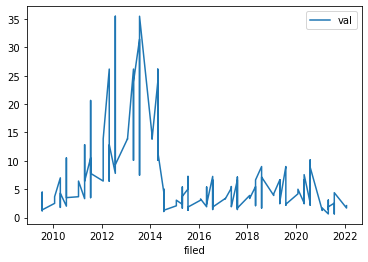

In [15]:
ts.plot()

In [16]:
type(ts)

pandas.core.frame.DataFrame

In [17]:
ts

,val
filed,
2009-07-22,4.10
2009-07-22,1.19
2010-01-25,2.50
2010-04-21,4.29
2010-04-21,1.79
...,...
2021-04-29,3.08
2021-04-29,1.40
2021-07-28,4.38


In [12]:
df

,id,companyname,startdate,enddate,val,accn,fy,fp,form,filed
0,3,Apple Inc.,2007-09-30,2008-06-28,4.10,0001193125-09-153165,2009,Q3,10-Q,2009-07-22
1,4,Apple Inc.,2008-03-30,2008-06-28,1.19,0001193125-09-153165,2009,Q3,10-Q,2009-07-22
2,8,Apple Inc.,2008-09-28,2008-12-27,2.50,0001193125-10-012085,2010,Q1,10-Q,2010-01-25
3,10,Apple Inc.,2008-09-28,2009-03-28,4.29,0001193125-10-088957,2010,Q2,10-Q,2010-04-21
4,11,Apple Inc.,2008-12-28,2009-03-28,1.79,0001193125-10-088957,2010,Q2,10-Q,2010-04-21
...,...,...,...,...,...,...,...,...,...,...
121,273,Apple Inc.,2020-09-27,2021-03-27,3.08,0000320193-21-000056,2021,Q2,10-Q,2021-04-29
122,274,Apple Inc.,2020-12-27,2021-03-27,1.40,0000320193-21-000056,2021,Q2,10-Q,2021-04-29
123,275,Apple Inc.,2020-09-27,2021-06-26,4.38,0000320193-21-000065,2021,Q3,10-Q,2021-07-28
124,276,Apple Inc.,2021-03-28,2021-06-26,1.30,0000320193-21-000065,2021,Q3,10-Q,2021-07-28


Text(0.5, 1.0, 'Quarterly diluted EPS for Apple')

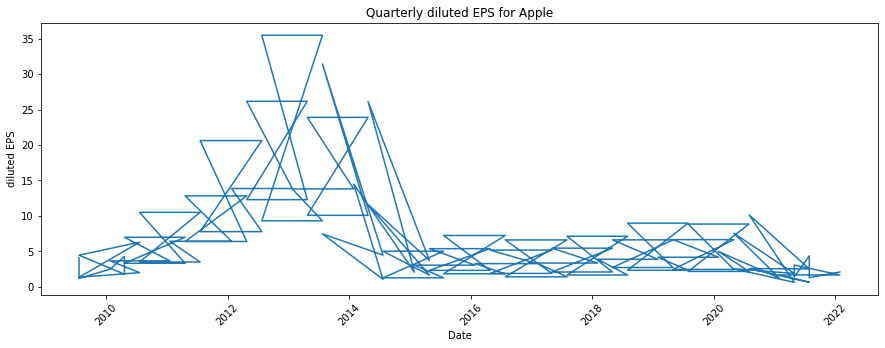

In [19]:
plt.figure(figsize=(15,5))
plt.plot(ts.index, ts['val'])
plt.ylabel('diluted EPS')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Quarterly diluted EPS for Apple')
# plt.savefig('img/apple_quarterlyEPS.png')

In [20]:
ts2 = df[['filed','val']]

Text(0.5, 1.0, 'Quarterly diluted EPS for Apple')

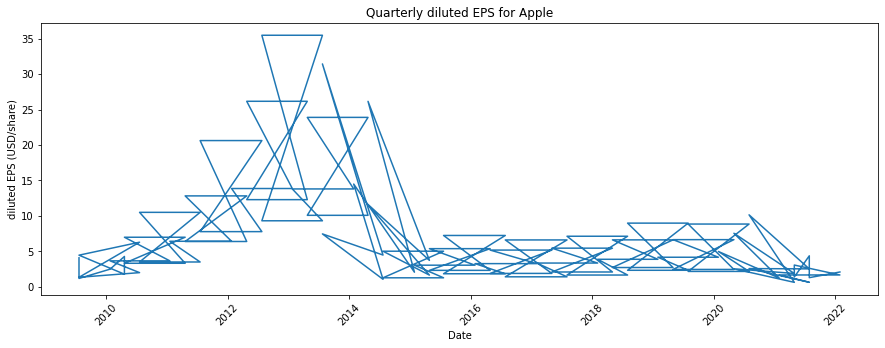

In [23]:
plt.figure(figsize=(15,5))
plt.plot(ts2['filed'], ts2['val'])
plt.ylabel('diluted EPS (USD/share)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Quarterly diluted EPS for Apple')
# plt.savefig('img/apple_quarterlyEPS.png')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'diluted EPS (USD/share)'),
 Text(0.5, 1.0, 'Quarterly diluted EPS for Apple')]

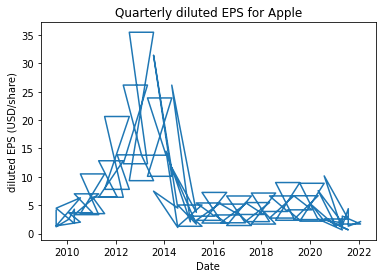

In [24]:
fig, ax = plt.subplots()
ax.plot(ts2['filed'], ts2['val'])
ax.set(xlabel='Date', ylabel='diluted EPS (USD/share)',
       title='Quarterly diluted EPS for Apple')

In [27]:
type(df['startdate'][0])

datetime.date

In [28]:
type(df['enddate'][0] - df['startdate'][0])

datetime.timedelta

In [29]:
(df['enddate'][0] - df['startdate'][0])

datetime.timedelta(days=272)

In [35]:
(df['enddate'][0] - df['startdate'][0]).days > 100

True

In [38]:
type((df['enddate'][0] - df['startdate'][0]).days)

int

In [46]:
df['period'] = (df['enddate'] - df['startdate'])

In [47]:
df

,id,companyname,startdate,enddate,val,accn,fy,fp,form,filed,period
0,9493,Apple Inc.,2007-09-30,2008-06-28,4.10,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,272 days
1,9494,Apple Inc.,2008-03-30,2008-06-28,1.19,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,90 days
2,9498,Apple Inc.,2008-09-28,2008-12-27,2.50,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,90 days
3,9500,Apple Inc.,2008-09-28,2009-03-28,4.29,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,181 days
4,9501,Apple Inc.,2008-12-28,2009-03-28,1.79,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,90 days
...,...,...,...,...,...,...,...,...,...,...,...
121,9763,Apple Inc.,2020-09-27,2021-03-27,3.08,0000320193-21-000056,2021,Q2,10-Q,2021-04-29,181 days
122,9764,Apple Inc.,2020-12-27,2021-03-27,1.40,0000320193-21-000056,2021,Q2,10-Q,2021-04-29,90 days
123,9765,Apple Inc.,2020-09-27,2021-06-26,4.38,0000320193-21-000065,2021,Q3,10-Q,2021-07-28,272 days
124,9766,Apple Inc.,2021-03-28,2021-06-26,1.30,0000320193-21-000065,2021,Q3,10-Q,2021-07-28,90 days


In [52]:
quarterly_df = df.copy()
quarterly_df = quarterly_df[quarterly_df['period'].dt.days < 100]

In [58]:
quarterly_df

,id,companyname,startdate,enddate,val,accn,fy,fp,form,filed,period
1,9494,Apple Inc.,2008-03-30,2008-06-28,1.19,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,90 days
2,9498,Apple Inc.,2008-09-28,2008-12-27,2.50,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,90 days
4,9501,Apple Inc.,2008-12-28,2009-03-28,1.79,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,90 days
7,9505,Apple Inc.,2009-03-29,2009-06-27,1.35,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,90 days
8,9506,Apple Inc.,2009-03-29,2009-06-27,2.01,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,90 days
...,...,...,...,...,...,...,...,...,...,...,...
119,9761,Apple Inc.,2020-09-27,2020-12-26,1.68,0000320193-21-000010,2021,Q1,10-Q,2021-01-28,90 days
120,9762,Apple Inc.,2020-09-27,2020-12-26,1.68,0000320193-22-000007,2022,Q1,10-Q,2022-01-28,90 days
122,9764,Apple Inc.,2020-12-27,2021-03-27,1.40,0000320193-21-000056,2021,Q2,10-Q,2021-04-29,90 days
124,9766,Apple Inc.,2021-03-28,2021-06-26,1.30,0000320193-21-000065,2021,Q3,10-Q,2021-07-28,90 days


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'diluted EPS (USD/share)'),
 Text(0.5, 1.0, 'Quarterly diluted EPS for Apple')]

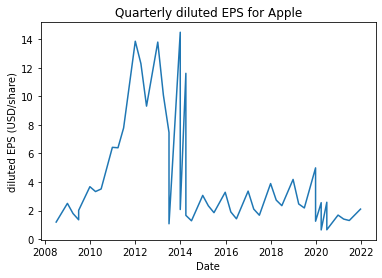

In [56]:
ts3 = quarterly_df[['enddate','val']] # actual enddate instead of when it was accounced/filed
fig, ax = plt.subplots()
ax.plot(ts3['enddate'], ts3['val'])
ax.set(xlabel='Date', ylabel='diluted EPS (USD/share)',
       title='Quarterly diluted EPS for Apple')

### Grab company names from SQL database

In [69]:
cursor.execute("SELECT DISTINCT(companyname) FROM earningspersharediluted WHERE form = '10-Q'")

In [70]:
results_company = cursor.fetchall()

In [71]:
results_company

[('DUKE ENERGY CORPORATION',),
 ('CHIPOTLE MEXICAN GRILL,Â\xa0INC.',),
 ('MATCH GROUP, INC.',),
 ('TERADYNE, INC.',),
 ('Healthpeak Properties, Inc.',),
 ('M&T BANK CORPORATION',),
 ('A. O. Smith Corporation',),
 ('BIOGEN INC.',),
 ('Altria Group, Inc.',),
 ('NORTHROP GRUMMAN CORP /DE/',),
 ('SYSCO CORP',),
 ('UNDER ARMOUR, INC.',),
 ('Ross Stores, Inc.',),
 ('FORTINET, INC.',),
 ('CITIZENS FINANCIAL GROUP INC/RI',),
 ('BOEING CO',),
 ('PACCAR Inc',),
 ('KELLOGG COMPANY',),
 ('CAMPBELL SOUP CO',),
 ('NORDSON CORPORATION',),
 ('CINCINNATI FINANCIAL CORP',),
 ('SCHLUMBERGER LIMITED/NV',),
 ('LAMB WESTON HOLDINGS, INC.',),
 ('LABORATORY CORP OF AMERICA HOLDINGS',),
 ('Crown Castle International Corp',),
 ('AMERICAN TOWER CORP /MA/',),
 ('ZEBRA TECHNOLOGIES CORPORATION',),
 ('VORNADO REALTY TRUST',),
 ('GENERAC HOLDINGS INC.',),
 ('Masco Corporation',),
 ('ALLIANT ENERGY CORP',),
 ('IDEX CORP',),
 ('CONAGRA BRANDS, INC.',),
 ('EVERSOURCE ENERGY',),
 ('QUALCOMM INC/DE',),
 ('The J. M. Smuck

In [73]:
company_list = list()
for comp in results_company:
    company_list.append(comp[0])
company_list

['DUKE ENERGY CORPORATION',
 'CHIPOTLE MEXICAN GRILL,Â\xa0INC.',
 'MATCH GROUP, INC.',
 'TERADYNE, INC.',
 'Healthpeak Properties, Inc.',
 'M&T BANK CORPORATION',
 'A. O. Smith Corporation',
 'BIOGEN INC.',
 'Altria Group, Inc.',
 'NORTHROP GRUMMAN CORP /DE/',
 'SYSCO CORP',
 'UNDER ARMOUR, INC.',
 'Ross Stores, Inc.',
 'FORTINET, INC.',
 'CITIZENS FINANCIAL GROUP INC/RI',
 'BOEING CO',
 'PACCAR Inc',
 'KELLOGG COMPANY',
 'CAMPBELL SOUP CO',
 'NORDSON CORPORATION',
 'CINCINNATI FINANCIAL CORP',
 'SCHLUMBERGER LIMITED/NV',
 'LAMB WESTON HOLDINGS, INC.',
 'LABORATORY CORP OF AMERICA HOLDINGS',
 'Crown Castle International Corp',
 'AMERICAN TOWER CORP /MA/',
 'ZEBRA TECHNOLOGIES CORPORATION',
 'VORNADO REALTY TRUST',
 'GENERAC HOLDINGS INC.',
 'Masco Corporation',
 'ALLIANT ENERGY CORP',
 'IDEX CORP',
 'CONAGRA BRANDS, INC.',
 'EVERSOURCE ENERGY',
 'QUALCOMM INC/DE',
 'The J. M. Smucker Company',
 'DIAMONDBACK ENERGY, INC.',
 'UNIVERSAL HEALTH SERVICES, INC.',
 'Charter Communications, In

In [74]:
company_list = sorted(company_list)

In [75]:
company_list

['3M COMPANY',
 'A. O. Smith Corporation',
 'ABBOTT LABORATORIES',
 'ABBVIE INC.',
 'ABIOMED, INC.',
 'ACTIVISION BLIZZARD,Â\xa0INC.',
 'ADOBE INC.',
 'ADVANCE AUTO PARTS, INC.',
 'ADVANCED MICRO DEVICES, INC.',
 'AIR PRODUCTS AND CHEMICALS, INC.',
 'AKAMAI TECHNOLOGIES, INC.',
 'ALASKA AIR GROUP, INC.',
 'ALBEMARLE CORPORATION',
 'ALEXANDRIA REAL ESTATE EQUITIES, INC.',
 'ALIGN TECHNOLOGY,Â\xa0INC.',
 'ALLIANT ENERGY CORP',
 'ALLSTATE CORP',
 'AMAZON.COM, INC.',
 'AMCOR PLC',
 'AMERICAN AIRLINES GROUP INC.',
 'AMERICAN ELECTRIC POWER COMPANY, INC.',
 'AMERICAN EXPRESS CO',
 'AMERICAN INTERNATIONAL GROUP, INC.',
 'AMERICAN TOWER CORP /MA/',
 'AMERIPRISE FINANCIAL, INC.',
 'AMERISOURCEBERGEN CORP',
 'AMETEK, Inc.',
 'AMPHENOL CORPORATION',
 'ANSYS INC',
 'ANTHEM, INC.',
 'APACHE CORPORATION',
 'APPLIED MATERIALS INC /DE',
 'ARCHER-DANIELS-MIDLAND CO',
 'ARTHUR J. GALLAGHER & CO.',
 'AT&T INC.',
 'ATMOS ENERGY CORP',
 'AUTOMATIC DATA PROCESSING, INC.',
 'AUTOZONE INC',
 'AVALONBAY COMMUN